# 01 Conversion Rate

## Challenge Description
We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are
repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).
Your project is to: 
Predict conversion rate
Come up with recommendations for the product team and the marketing team to improve conversion rate

## Data Description
- country : user country based on the IP address
- age : user age. Self-reported at sign-in step
- new_user : whether the user created the account during this session or had already an account and simply came back to the site
- source : marketing channel source
    -  Ads: came to the site by clicking on an advertisement
    -  Seo: came to the site by clicking on search results
    -  Direct: came to the site by directly typing the URL on the browser
- total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
- converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions/ total sessions.

In [9]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Analyze by describing data
### Which features are available in the data set?

In [10]:
# load dataset
data = pd.read_csv("data/conversion_data.csv")
print(data.columns.values)

['country' 'age' 'new_user' 'source' 'total_pages_visited' 'converted']


### Which features are categorical?
These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.
- country, new_user, source

### Which features are numerical?
Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.
- age, total_page_visited

In [11]:
# preview the data
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### Which features may contain errors or typos?

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [12]:
data.tail()

,country,age,new_user,source,total_pages_visited,converted
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0
316199,UK,24,0,Ads,4,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


- Total samples are 316200
- Converted is a categorical feature with 0 or 1 values
- Overall conversion rate is about 3.2%
- Around 69% new users
- Few elder users
- Average page view is about 5

In [14]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


- country variable as four possible values: US (Top, 178092), China, UK, and Germany
- source variable as three possible values: Seo (Top,49%), Ads, and Direct

In [15]:
print(data.describe(include=['O']))
print("_"*40)
print(data['country'].value_counts())
print("_"*40)
print(data['source'].value_counts())

       country  source
count   316200  316200
unique       4       3
top         US     Seo
freq    178092  155040
________________________________________
US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64
________________________________________
Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64


## Analyze by pivoting features
- Convertion rate of new users are much lower, only 1.4%
- Convertion rate of Gemany and UK are above average, which conversion rate of China is only 0.1%
- Convertion rates from different sources do not vary much 


In [16]:
categories = ['new_user', 'country', 'source']
for cate in categories:
    print (data[[cate, 'converted']].groupby([cate], as_index=False).mean().sort_values(by='converted', ascending=False))
    print ("_"*40)

   new_user  converted
0         0   0.072002
1         1   0.014021
________________________________________
   country  converted
1  Germany   0.062500
2       UK   0.052632
3       US   0.037801
0    China   0.001332
________________________________________
   source  converted
0     Ads   0.034483
2     Seo   0.032895
1  Direct   0.028169
________________________________________


## Analyze by visualizing data
- Users whose age < 50 are more likely to purchase
- Total page view ranges from 10 - 20 are more likely to purchase

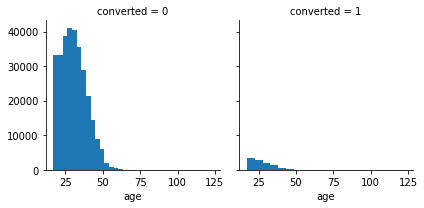

In [17]:
g = sns.FacetGrid(data, col='converted')
g.map(plt.hist, 'age', bins=20)

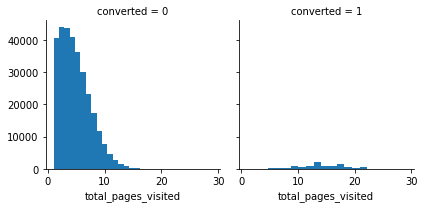

In [18]:
g = sns.FacetGrid(data, col='converted')
g.map(plt.hist, 'total_pages_visited', bins=20)

## Correlating numerical and category features

### Findings
- Contry and age do not have much correlation

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


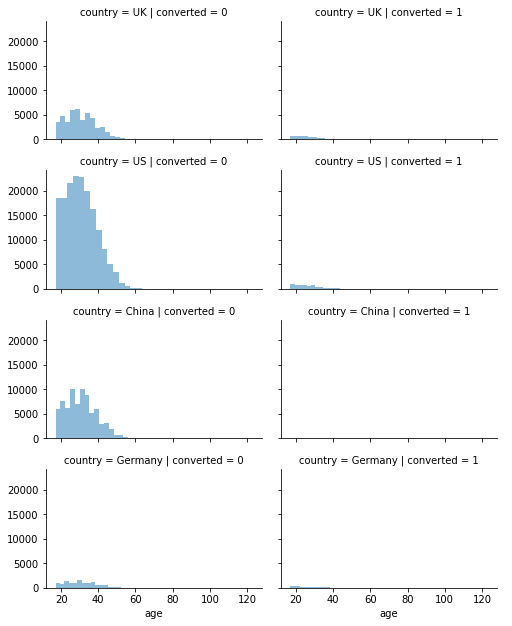

In [19]:
grid = sns.FacetGrid(data, col='converted', row='country', height=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

## Correlating categorical features
### Observations
- Old users had much higher conversion rate than new users
- Chinese users had much lower converstion rate than users from other countries
- Conversion rate does not vary much by source 
### Findings
- Though converstion rate of Chinese users are really low, 0.13%, return Chinese users from direct source actually have the highest converstion rate
### Decisions
- Add source and country to the model

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


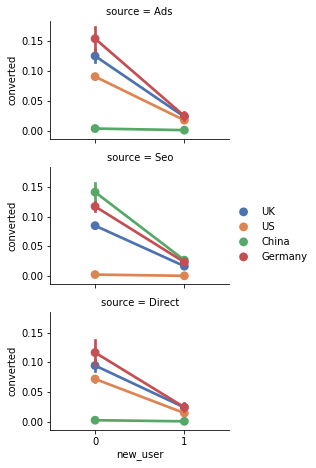

In [23]:
grid = sns.FacetGrid(data, row='source', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'new_user', 'converted','country', palette='deep')
grid.add_legend()

## Wrangle data
### Observations
the original data set is highly imblance with only 3% converted records and the total sample size is actually large (316200)
### Decisions
- Undersampling 1/1
- Conduct train test split 7/3

In [1]:
# !pip uninstall scikit-learn -y
# !pip install scikit-learn

In [2]:
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.model_selection import train_test_split
# X, y = data[['country', 'age', 'new_user', 'source', 'total_pages_visited']], data['converted']
# ros = RandomUnderSampler(random_state = 0)
# ros.fit(X, y)
# X_resampled, y_resampled = ros.fit_sample(X, y)

In [81]:
X_resampled = pd.read_csv("data/X_resampled.csv")
y_resampled = pd.read_csv("data/y_resampled.csv")

### Completing categorical feature
Transform categorical variables to dummy variables.

In [35]:
# print(X_resampled.sample(10))
# print(X_resampled["0"].value_counts())
# print(X_resampled["3"].value_counts())
# X_resampled['0'] = X_resampled['0'].map( {'US': 0, 'UK': 1, 'China': 2, 'Germany':3} ).astype(int)
# X_resampled['3'] = X_resampled['3'].map( {'Seo': 0, 'Ads': 1, 'Direct': 2} ).astype(int)

In [83]:
X_resampled.columns = ['country','age', 'new_user', 'source','total_pages_visited']
y_resampled.columns = ['converted']
df = pd.DataFrame(X_resampled['country'])
df = pd.concat([X_resampled, pd.get_dummies(df,prefix=['country'])], axis =1 )
source = pd.DataFrame(X_resampled['source'])
df = pd.concat([df, pd.get_dummies(source,prefix=['source'])], axis =1 )
df.drop(['country', 'source'],axis=1, inplace=True)
df.sample(10)

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
397,39,0,7,0,0,0,1,1,0,0
16745,28,0,16,0,0,0,1,1,0,0
17528,17,0,11,0,0,0,1,1,0,0
17804,24,0,12,0,0,0,1,1,0,0
2710,42,1,6,1,0,0,0,1,0,0
12882,23,1,18,0,0,0,1,0,1,0
17474,23,0,13,0,0,0,1,0,0,1
8706,20,0,5,0,0,0,1,0,0,1
207,27,1,2,1,0,0,0,0,1,0
9615,32,1,7,0,0,0,1,1,0,0


In [85]:
X_resampled = df

## Model, predict and solve
- Logistic Regression
- Decision Tree
- Support Vector Machines
- Naive Bayes classifier
- Perceptron
- KNN
- Linear SVC
- Random Forest
- SGD

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape

((14280, 10), (14280, 1), (6120, 10))

In [109]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train.values.ravel()) * 100, 2)
acc_log_act = round(logreg.score(X_test, y_test.values.ravel()) * 100, 2)
acc_log, acc_log_act

(94.3, 93.64)

- total pages visited is the highest positive coefficient, implying as total pages visited increases, the probability of convert=1 increases the most.
- Inversely, the new user value increase, probability of converted=1 decreases the most, which means new users are less likely to purchase.
- Customers from Germany are most likely to purchase, followed by UK


In [100]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
2,total_pages_visited,0.755085
4,country_Germany,0.428349
5,country_UK,0.304160
6,country_US,-0.071236
0,age,-0.073173
9,source_Seo,-0.805955
7,source_Ads,-0.868449
8,source_Direct,-1.090616
1,new_user,-1.742462
3,country_China,-3.426294


In [111]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train.values.ravel())
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train.values.ravel()) * 100, 2)
acc_decision_tree_act = round(decision_tree.score(X_test, y_test.values.ravel()) * 100, 2)
acc_decision_tree,acc_decision_tree_act

(96.81, 91.8)

In [112]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train.values.ravel())
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train.values.ravel()) * 100, 2)
acc_svc_act = round(svc.score(X_test, y_test.values.ravel()) * 100, 2)
acc_svc,acc_svc_act

(94.43, 93.5)

In [113]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train.values.ravel()) * 100, 2)
acc_gaussian_act = round(gaussian.score(X_test, y_test.values.ravel()) * 100, 2)
acc_gaussian, acc_gaussian_act

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(91.61, 90.93)

In [114]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train.values.ravel()) * 100, 2)
acc_perceptron_act = round(perceptron.score(X_test, y_test.values.ravel()) * 100, 2)
acc_perceptron, acc_perceptron_act

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(93.91, 93.46)

In [115]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train.values.ravel())
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train.values.ravel()) * 100, 2)
acc_linear_svc_act = round(linear_svc.score(X_test, y_test.values.ravel()) * 100, 2)
acc_linear_svc, acc_linear_svc_act

(94.06, 93.63)

In [116]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train.values.ravel())
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train.values.ravel()) * 100, 2)
acc_sgd_act = round(sgd.score(X_test, y_test.values.ravel()) * 100, 2)
acc_sgd, acc_sgd_act

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


(93.87, 93.53)

In [118]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train.values.ravel()) * 100, 2)
acc_random_forest_act = round(random_forest.score(X_test, y_test.values.ravel()) * 100, 2)
acc_random_forest, acc_random_forest_test

(96.8, 92.3)

In [119]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train.values.ravel()) * 100, 2)
acc_knn_act = round(knn.score(X_test, y_test.values.ravel()) * 100, 2)
acc_knn, acc_knn_act

(95.4, 92.22)

### Model Evaluation
- From the result, Logistic Regression performs best in test set.

In [120]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Train Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
    'Test Score': [acc_svc_act, acc_knn_act, acc_log_act, 
              acc_random_forest_act, acc_gaussian_act, acc_perceptron_act, 
              acc_sgd_act, acc_linear_svc_act, acc_decision_tree_act]})
models.sort_values(by='Test Score', ascending=False)

,Model,Test Score,Train Score
2,Logistic Regression,93.64,94.30
7,Linear SVC,93.63,94.06
6,Stochastic Gradient Decent,93.53,93.87
0,Support Vector Machines,93.50,94.43
5,Perceptron,93.46,93.91
3,Random Forest,92.57,96.80
1,KNN,92.22,95.40
8,Decision Tree,91.80,96.81
4,Naive Bayes,90.93,91.61
